In [169]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from random import choice 


In [103]:
url="https://janaf.nist.gov/tables/C-067.txt"
file=requests.get(url)
datos=file.text
datos=datos.split("\n")[3:-1] #partimos los datos donde encontremos /n, luego los corchetes se utilizan para eliminar
#las dos primeras linas aliminando el nombre.
mat=[] #se utiliza mat para cambiar la tabla en numeros 
for x in datos:
    s=x.split("\t")
    print(s)
    mat.append([float(a) for a in (s)]) #pasa de lista de cadena a punto flotante
mat=np.array(mat)

['100', '33.258', '149.500', '216.485', '-6.698', '-69.644', '-64.353', '33.615']
['200', '33.473', '172.577', '189.418', '-3.368', '-72.027', '-58.161', '15.190']
['250', '34.216', '180.113', '186.829', '-1.679', '-73.426', '-54.536', '11.395']
['298.15', '35.639', '186.251', '186.251', '0.', '-74.873', '-50.768', '8.894']
['300', '35.708', '186.472', '186.252', '0.066', '-74.929', '-50.618', '8.813']
['350', '37.874', '192.131', '186.694', '1.903', '-76.461', '-46.445', '6.932']
['400', '40.500', '197.356', '187.704', '3.861', '-77.969', '-42.054', '5.492']
['450', '43.374', '202.291', '189.053', '5.957', '-79.422', '-37.476', '4.350']
['500', '46.342', '207.014', '190.614', '8.200', '-80.802', '-32.741', '3.420']
['600', '52.227', '215.987', '194.103', '13.130', '-83.308', '-22.887', '1.993']
['700', '57.794', '224.461', '197.840', '18.635', '-85.452', '-12.643', '0.943']
['800', '62.932', '232.518', '201.675', '24.675', '-87.238', '-2.115', '0.138']
['900', '67.601', '240.205', '20

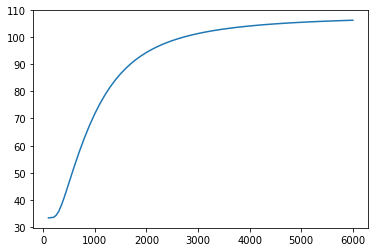

In [104]:
T=mat[:,0] #Para agarrar los valores que nos interezan de los datos obtenidos anteriormente 
Cp=mat[:,1]
plt.plot(T,Cp)
plt.show()

In [105]:
T=T[3:16] #columna por #de fila del valor que deseamos 
y=Cp[3:16]
t=T/1000
n=len(T)
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T #arreglo para x con traspuesta y arreglo de nymp
beta=np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y)) #x transpuesta por x
beta


array([ -0.42317857, 107.50201452, -41.34537789,   5.39384261,
         0.67123974])

In [106]:
Cp_calc=beta.dot(X.T)

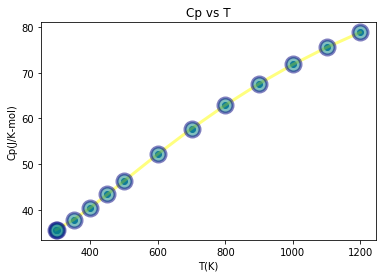

In [107]:
plt.scatter(T,y)
plt.plot(T,Cp_calc,color="yellow",linewidth=3,alpha=0.5,marker="o",markersize=15,markeredgewidth=3,markeredgecolor="navy",markerfacecolor="teal")
plt.xlabel("T(K)")
plt.ylabel("Cp(J/K-mol)")
plt.title("Cp vs T")
plt.show()

In [95]:
A=-0.42317857
B=107.50201452
C=-41.34537789
D=5.39384261
E=0.67123974

deltaH_298=-74.873 #kJ/mol
deltaS_298=186.251  #J/mol



In [85]:
dT=0.1
T=np.arange(298,1200,dT) #se esta generando una matriz con los datos (el T es la T en kelvin)
t=T/1000
Cp_CH4=A+B*t+C*t**2+D*t**3+E/t**2  #(J/mol)   CAPACIDAD CALORIFICA 
deltaH_CH4=np.cumsum(Cp_CH4*dT)+deltaH_298*1000  #se utiliza para calcular H 
deltaS_CH4=np.cumsum(Cp_CH4/T*dT)+deltaS_298
deltaG_CH4=deltaH_CH4-T*deltaS_CH4

In [86]:
n=len(T)
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T
Cp_CH4=X.dot(beta)


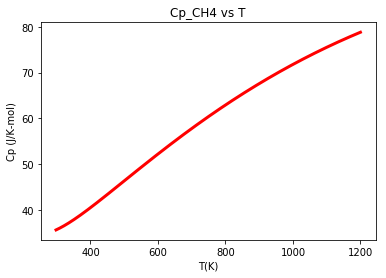

In [87]:
plt.plot(T,Cp_CH4,color="red",linewidth=3) #CAPACIDAD CALORIFICA 
plt.title("Cp_CH4 vs T")
plt.xlabel("T(K)")
plt.ylabel("Cp (J/K-mol)")
plt.show()

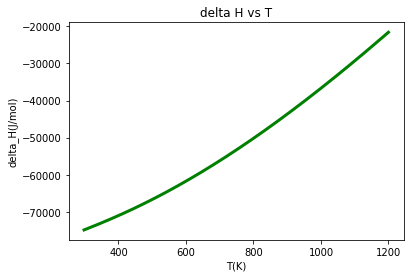

In [91]:
plt.plot(T,deltaH_CH4,color="green",linewidth=3)  #ENTALPIA 
plt.xlabel("T(K)")
plt.ylabel("delta_H(J/mol)")
plt.title("delta H vs T")
plt.show()


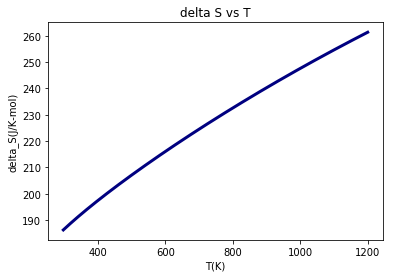

In [89]:
plt.plot(T,deltaS_CH4,color="navy",linewidth=3) #ENTROPIA 
plt.xlabel("T(K)")
plt.ylabel("delta_S(J/K-mol)")
plt.title("delta S vs T")
plt.show()

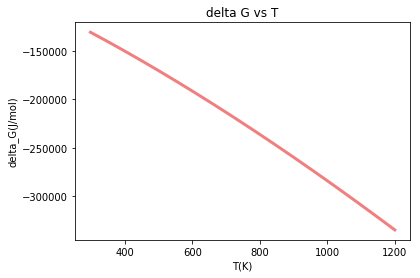

In [90]:
plt.plot(T,deltaG_CH4,color="lightcoral",linewidth=3) #ENERGIA LIBRE DE GIBBS 
plt.xlabel("T(K)")
plt.ylabel("delta_G(J/mol)")
plt.title("delta G vs T")
plt.show()

## Problema 2: Cálculo de la constante de equilibrio

In [114]:
deltaS_NO=210.758
deltaH_NO=90.291*1000
deltaS_O2=205.147
deltaH_O2=0*1000
deltaS_NO2=240.034
deltaH_NO2=33.095*1000

T=298.15 #T en kelvin 
pt=1.0 #presion en bar
R=8.314 #J/K-mol

In [115]:
#calculo de delta G que es igual al potencial  1RA MANERA DE CALCULAR EL MINIMO 
uNO_est=deltaH_NO-T*deltaS_NO
uO2_est=deltaH_O2-T*deltaS_O2
uNO2_est=deltaH_NO2-T*deltaS_NO2
print(uNO_est,uO2_est,uNO2_est)

27453.5023 -61164.57804999999 -38471.13709999999


In [125]:
#calculo de fraccion molar donde x varia de cero hasta 1
x=np.arange(0.001,1,0.001)#se aumenta un cero para aumentar la presicion 
n_NO=1-x # x es shi
n_NO2=x
n_O2=(0.5-(0.5*x))
nt=1.5-0.5*x

X_NO=n_NO/nt
X_O2=n_O2/nt
X_NO2=n_NO2/nt

In [126]:
uNO=uNO_est+R*T*np.log(X_NO) #ESTE ES EL MIU DEL NO
uO2=uO2_est+R*T*np.log(X_O2) #miu del O2
uNO2=uNO2_est+R*T*np.log(X_NO2) #miu del NO2
uT=n_NO*uNO+n_O2*uO2+n_NO2*uNO2

[0.999]


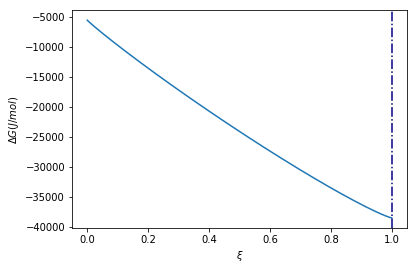

In [127]:
#mitad
minimo=np.min(uT)
n=np.where(minimo==uT)
xeq=x[n]
print(xeq)

#grafica
plt.plot(x,uT)  #despues de hacer la grafica puedo saber donde esta el minimo usando minimo=np.min(uT) y colado en la 
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\Delta G (J/mol)$')    
plt.axvline(x=xeq,color="navy",linestyle="-.")
plt.show() # mitad

In [131]:
#equilibrio                                   2DA MANERA DE CALCULAR EL MINIMO
pNO2=(xeq)/((1.5-0.5*xeq)*pt) #pt=presion total
pNO=(1-xeq)/((1.5-0.5*xeq)*pt)
pO2=(0.5-(0.5*xeq))/((1.5-0.5*xeq)*pt)
Kp=pNO2/(pNO*(pO2**0.5))
print(Kp)



[44687.8059542]


## Problema 3: ADN

In [241]:
longitud=1000
bases_nitrogenadas="AGCT"
k=""
k=k.join([choice(bases_nitrogenadas) for i in range (longitud)])
print(k)

GGTACCTGGGTCCTGCACCCTGTGTCTTGATGATCCCGACTTTATATGGCGATCTAAATGAAGTCGCGTAACTTGAAACTGAAGGATGAATGCTGCTGGACTACGTTCTATTACAACGGGGGACGTCACCGCACCCAGGTGAGCACCCCGTAGCAGGCAGGCTGAAGAGTAATACTGATCTGAAAATACGTCTAACGTATATAGATGCACAATCTGGGGCTCTGGCCCGGGCGTTCTGTTTGATCGCTGGTGGTTAGAGAACCGATCTTTGTACTCGGTTTCATTCAGCGTCATCAACACATGTAGTGAGAGTCATCTTCGCCATAATCATATGGACCTATTTATTACTTCATAAGTGGAACCGGTGAGACCCTAGTTAACATCGCTAGTTTGCCCTGTGGTACCATGCATGCCCAAGTTGAGTTGAAAGAGATTCTTTCTATGCTGCAAGCTTAATGCCATGAACCAATACTCTAAAAGGCCAGAGTTCTAGAAGCGGTGTTGTCTCAATCAACGGTGCCTCGTCGATTGTATTGAGGGGAGATAATGGGGTCGAGATGGGGGGTTGAAAGTGACATAAAAGGTCCCAGCGCTTGCTCGAACCTGTCCGAGGCCATTCAGTGGCCATGGTTGCAATTGGTTCGACGTTCCGCCTCTTCGCGATTTAGACATAGCTGCTGTTCTGGGATCCTGTTAGTATTGTCCCAGAGACTCTTGCTATGAACGTCCCGGTCTCGCTGACCTCGGTTGTAATTACAGACCTGCACTGGCACGTGACGTAATCCGACGTCCGGAGGTTACCGCGATTCACATCTGAAGCCAGCCTCCGTTTCGCTGGTTGCAAAGTAGATTTGCGACAGTACTACACTAGATACAGCGCCATTGAGGCGCTCACCGCTCTGTTGGCTCGAATCATTCGACTCATCTGTTAGAGATTCCGTCATCCTTGCCTCCGTGTCCGTCACTAACATATCAGTGGAACGCCTAAAAGGTAAGCTGG

In [242]:
k.count("A")


235

In [243]:
A

-0.42317857

In [244]:
k.count("C")


241

In [245]:
C

-41.34537789

In [246]:
k.count("G")


254

In [247]:

k.count("T")

270

In [248]:
T

298.15

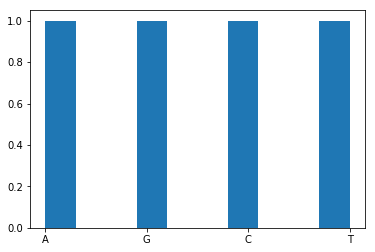

In [249]:
x="A","G","C","T"
plt.hist(x)
plt.show()